In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    response = requests.get(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
 # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santo antonio do ica
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | yangor
City not found. Skipping...
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | nouadhibou
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | byford
Processing Record 9 of Set 1 | andergrove
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | nar'yan-mar
Processing Record 12 of Set 1 | minas de marcona
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hpa-an
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | guiyang
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | kavaratti
Processing Record 20 of Set 1 | ad darb
Processing Record 21 of Set 1 | north bend
Pr

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [23]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santo antonio do ica,-3.1022,-67.9397,25.11,62,32,1.32,BR,1724983762
1,waitangi,-43.9535,-176.5597,13.79,91,55,2.24,NZ,1724983605
2,udachny,66.4167,112.4000,12.31,49,1,2.87,RU,1724983609
3,port-aux-francais,-49.3500,70.2167,3.27,70,99,11.76,TF,1724983649
4,nouadhibou,20.9310,-17.0347,22.99,73,20,8.75,MR,1724983767
...,...,...,...,...,...,...,...,...,...
564,rozdilna,46.8433,30.0792,20.59,58,100,3.11,UA,1724984434
565,sakaraha,-22.9000,44.5333,15.47,83,1,0.57,MG,1724984435
566,mtambile,-5.3833,39.7000,24.33,80,7,6.09,TZ,1724984436
567,bonthe,7.5264,-12.5050,24.40,89,34,4.92,SL,1724984438


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santo antonio do ica,-3.1022,-67.9397,25.11,62,32,1.32,BR,1724983762
1,waitangi,-43.9535,-176.5597,13.79,91,55,2.24,NZ,1724983605
2,udachny,66.4167,112.4000,12.31,49,1,2.87,RU,1724983609
3,port-aux-francais,-49.3500,70.2167,3.27,70,99,11.76,TF,1724983649
4,nouadhibou,20.9310,-17.0347,22.99,73,20,8.75,MR,1724983767
...,...,...,...,...,...,...,...,...,...
564,rozdilna,46.8433,30.0792,20.59,58,100,3.11,UA,1724984434
565,sakaraha,-22.9000,44.5333,15.47,83,1,0.57,MG,1724984435
566,mtambile,-5.3833,39.7000,24.33,80,7,6.09,TZ,1724984436


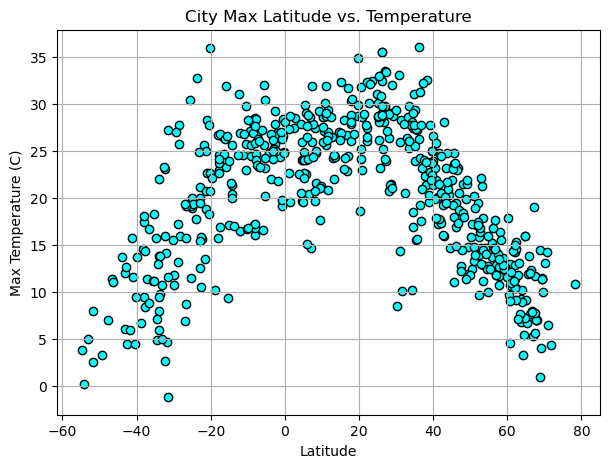

In [26]:
latitudes = city_data_df['Lat']
temperatures = city_data_df['Max Temp']

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(7, 5))
plt.scatter(latitudes, temperatures, marker='o', color='aqua', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True) 


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

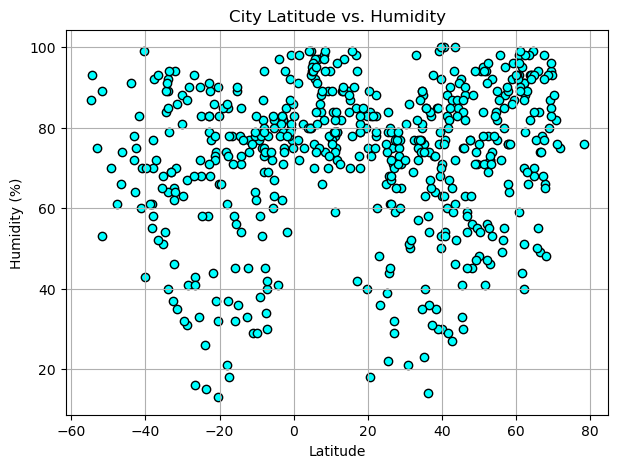

In [27]:
latitudes = city_data_df['Lat']
humidity = city_data_df['Humidity']

# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7, 5))
plt.scatter(latitudes, humidity, marker='o', color='aqua', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

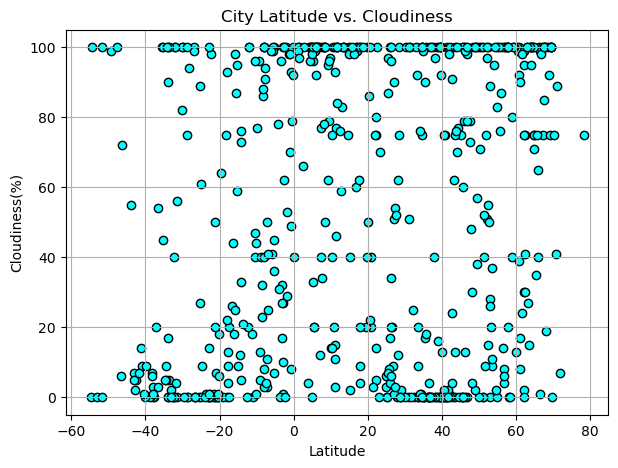

In [28]:
latitudes = city_data_df['Lat']
clouds = city_data_df['Cloudiness']

# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7, 5))
plt.scatter(latitudes, clouds, marker='o', color='aqua', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True) 


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

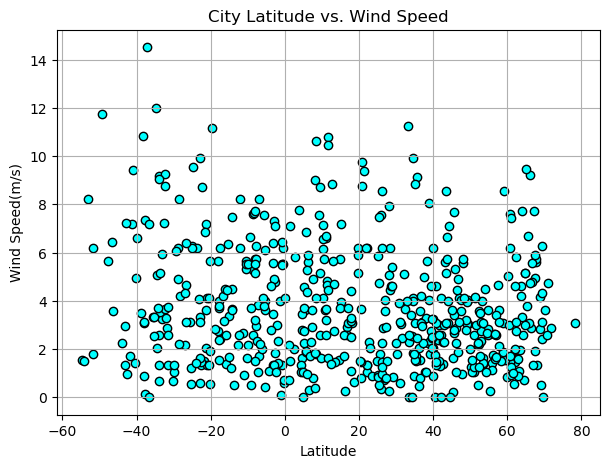

In [29]:
latitudes = city_data_df['Lat']
wind = city_data_df['Wind Speed']

# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7, 5))
plt.scatter(latitudes, wind, marker='o', color='aqua', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid(True) 


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,udachny,66.4167,112.4000,12.31,49,1,2.87,RU,1724983609
4,nouadhibou,20.9310,-17.0347,22.99,73,20,8.75,MR,1724983767
8,hawaiian paradise park,19.5933,-154.9731,28.74,80,20,6.17,US,1724983772
9,nar'yan-mar,67.6713,53.0870,6.98,66,100,5.60,RU,1724983607
12,hpa-an,16.8906,97.6333,26.70,85,60,2.92,MM,1724983776


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santo antonio do ica,-3.1022,-67.9397,25.11,62,32,1.32,BR,1724983762
1,waitangi,-43.9535,-176.5597,13.79,91,55,2.24,NZ,1724983605
3,port-aux-francais,-49.3500,70.2167,3.27,70,99,11.76,TF,1724983649
5,adamstown,-25.0660,-130.1015,18.95,68,61,6.28,PN,1724983769
6,byford,-32.2167,116.0000,15.93,65,40,8.75,AU,1724983770


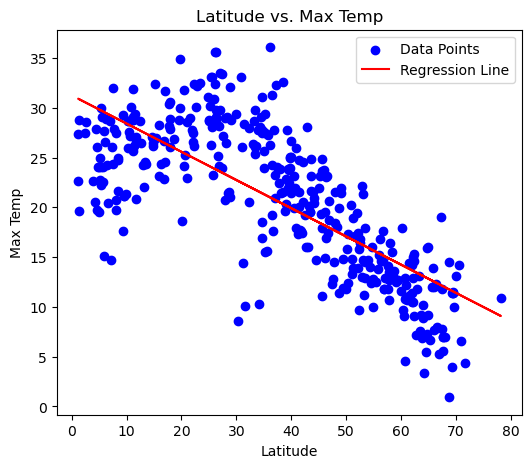

In [35]:
#MAX TEMP

# Linear regression on Northern Hemisphere

latitudes = northern_hemi_df['Lat']
max_temps = northern_hemi_df['Max Temp']

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temps)

# regression line
regression_line = slope * latitudes + intercept

# Plot the data
plt.figure(figsize=(6, 5))
plt.scatter(latitudes, max_temps, color='blue', label='Data Points')
plt.plot(latitudes, regression_line, color='red', label='Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
plt.legend()
plt.show()

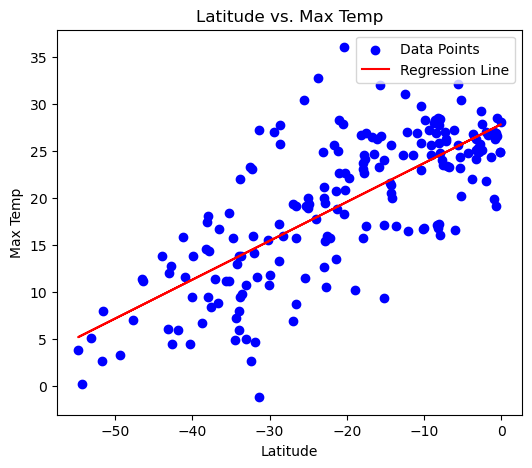

In [37]:
# Linear regression on Southern Hemisphere

latitudes = southern_hemi_df['Lat']
max_temps = southern_hemi_df['Max Temp']

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes, max_temps)

# regression line
regression_line = slope * latitudes + intercept

# Plot the data
plt.figure(figsize=(6, 5))
plt.scatter(latitudes, max_temps, color='blue', label='Data Points')
plt.plot(latitudes, regression_line, color='red', label='Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
plt.legend()
plt.show()

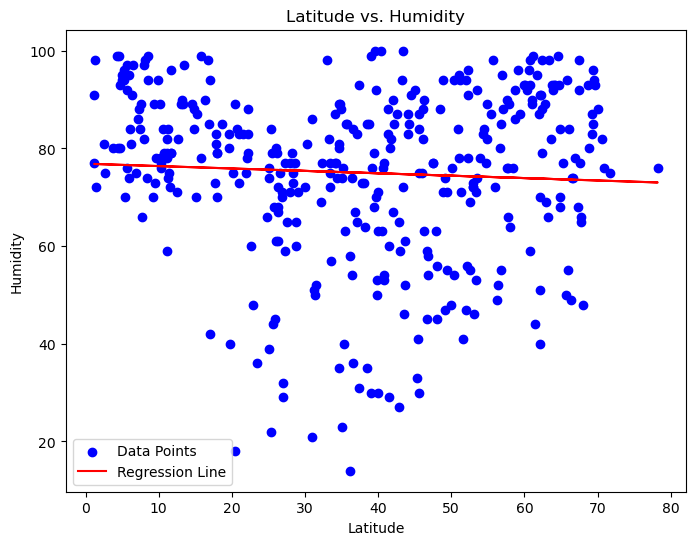

In [16]:
#HUMIDITY

# Linear regression on Northern Hemisphere

latitudes = northern_hemi_df['Lat']
humidity = northern_hemi_df['Humidity']

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes, humidity)

# regression line
regression_line = slope * latitudes + intercept

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, humidity, color='blue', label='Data Points')
plt.plot(latitudes, regression_line, color='red', label='Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.legend()
plt.show()

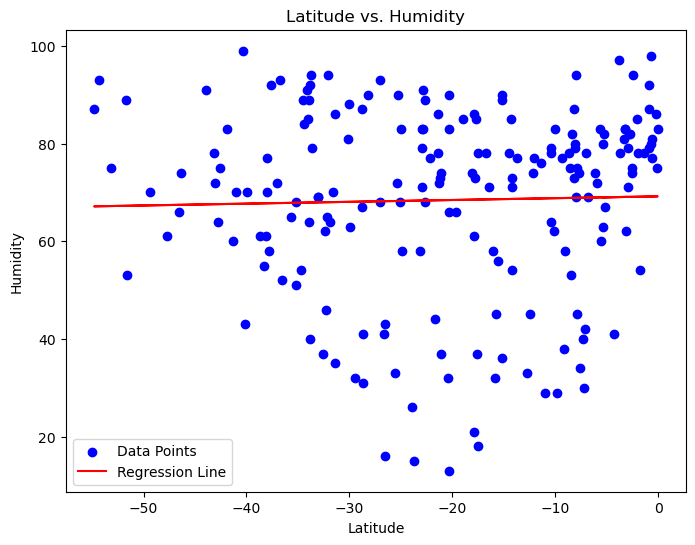

In [17]:
# Southern Hemisphere

latitudes = southern_hemi_df['Lat']
humidity = southern_hemi_df['Humidity']

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes, humidity)

# regression line
regression_line = slope * latitudes + intercept

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, humidity, color='blue', label='Data Points')
plt.plot(latitudes, regression_line, color='red', label='Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.legend()
plt.show()

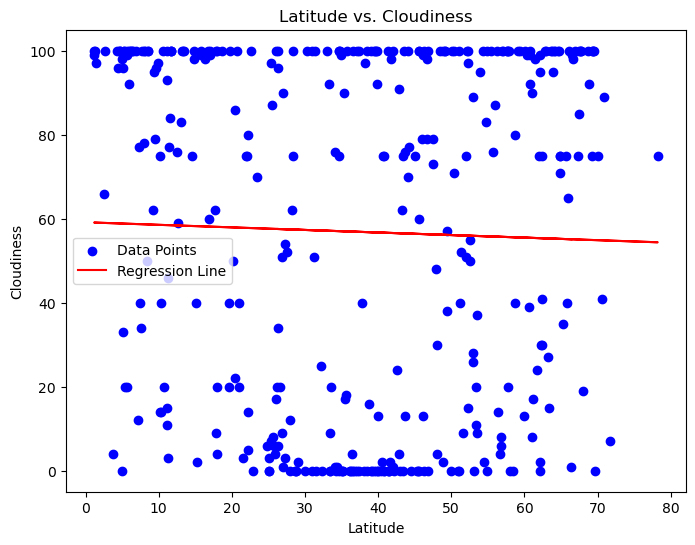

In [18]:
#CLOUDINESS

# Northern Hemisphere

latitudes = northern_hemi_df['Lat']
cloudiness = northern_hemi_df['Cloudiness']

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes, cloudiness)

# regression line
regression_line = slope * latitudes + intercept

# Plot the data 
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, cloudiness, color='blue', label='Data Points')
plt.plot(latitudes, regression_line, color='red', label='Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.legend()
plt.show()

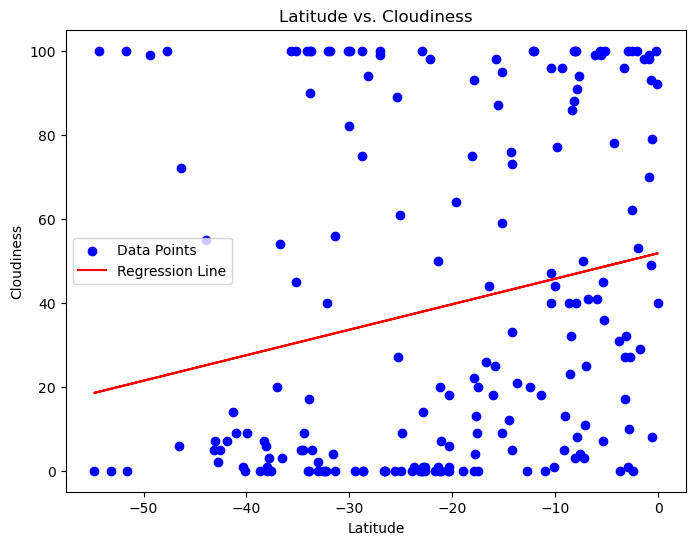

In [19]:
# Southern Hemisphere
# YOUR CODE HERE

latitudes = southern_hemi_df['Lat']
cloudiness = southern_hemi_df['Cloudiness']

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes, cloudiness)

# regression line
regression_line = slope * latitudes + intercept

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, cloudiness, color='blue', label='Data Points')
plt.plot(latitudes, regression_line, color='red', label='Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.legend()
plt.show()

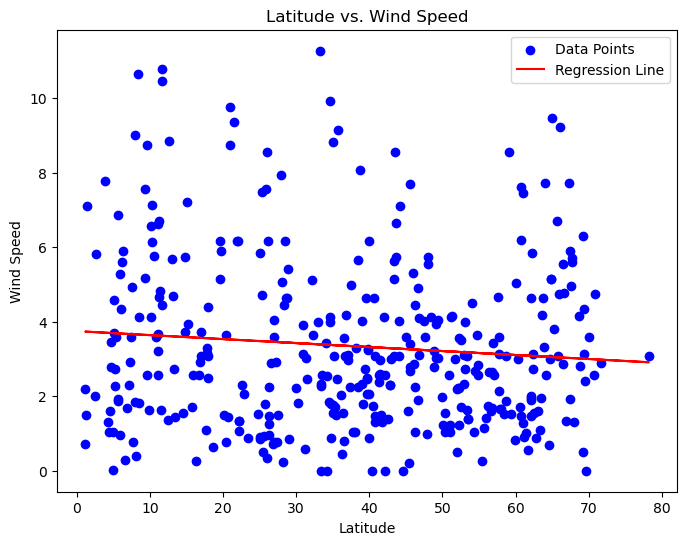

In [20]:
#WIND SPEED

# Northern Hemisphere

latitudes = northern_hemi_df['Lat']
wind_speed = northern_hemi_df['Wind Speed']

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes, wind_speed)

# regression line
regression_line = slope * latitudes + intercept

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, wind_speed, color='blue', label='Data Points')
plt.plot(latitudes, regression_line, color='red', label='Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.legend()
plt.show()

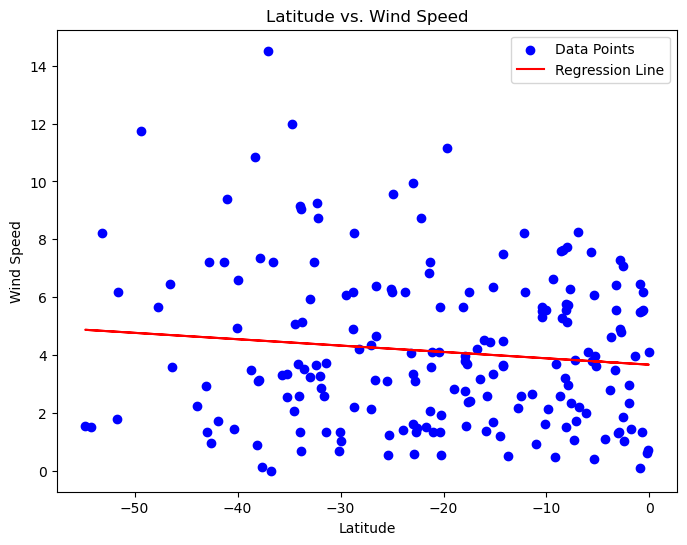

In [21]:
# Southern Hemisphere
# YOUR CODE HERE

latitudes = southern_hemi_df['Lat']
wind_speed = southern_hemi_df['Wind Speed']

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes, wind_speed)

# regression line
regression_line = slope * latitudes + intercept

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, wind_speed, color='blue', label='Data Points')
plt.plot(latitudes, regression_line, color='red', label='Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.legend()
plt.show()